## Imports

In [1]:
!pip install --upgrade
!pip install sympy 
!pip install sklearn
import sympy
import sklearn

ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from math import log

%matplotlib inline

## Formula
$f(x)=x^2+x+1$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
#Make data
x_1 = np.linspace(start=-3,stop=3,num=500)

<function matplotlib.pyplot.show(*args, **kw)>

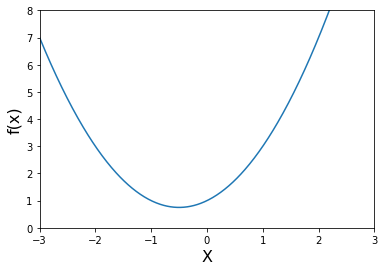

In [5]:
#Plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1))
plt.show

## Derivative
$f'(x)=2x+1$


In [6]:
def df(x):
    return 2*x + 1

<function matplotlib.pyplot.show(*args, **kw)>

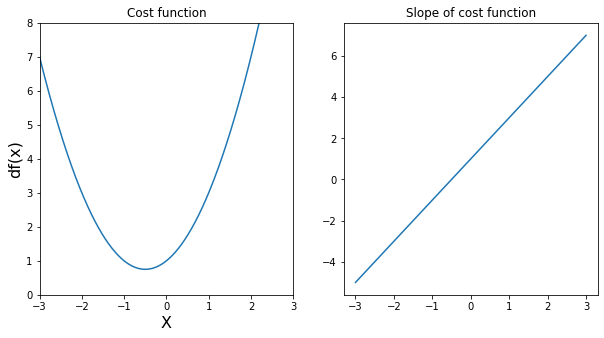

In [7]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.title("Cost function")
plt.xlabel('X',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1,f(x_1))

plt.subplot(1,2,2)
plt.title("Slope of cost function")
plt.plot(x_1,df(x_1))
plt.show

## Python Loops and Gradient Descent
The fast way down is the direction in which the slope is the steepest.
Need to have a Convex function (has a minimum), not concave (like a mountain)

In [8]:
for n in range(5):
    print ("Hello World",n)

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4


In [9]:
counter = 0
while (counter < 5):
    print("counting",counter)
    counter += 1

counting 0
counting 1
counting 2
counting 3
counting 4


In [10]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1

for n in range(1000):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

print("Local minimum at: ", new_x)
print("Slope at this point is: ", df(new_x))

Local minimum at:  -0.4999999999999999
Slope at this point is:  2.220446049250313e-16


## Multiple Minima and Advanced Functions
$g(x) = x^4 - 4x^2+ 5$

In [11]:
x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

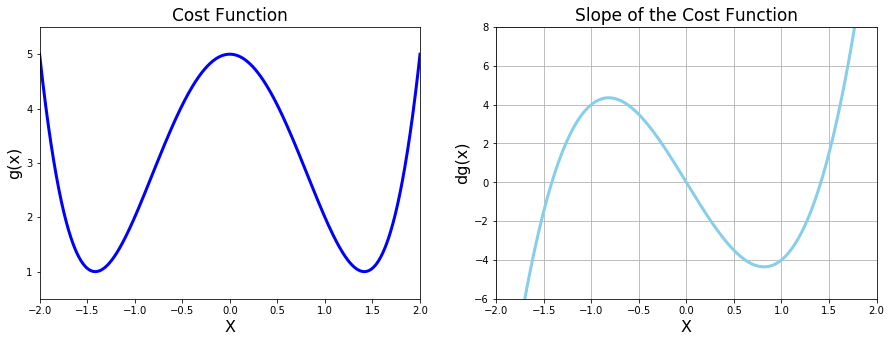

In [12]:
plt.figure(figsize=[15,5])

#1. Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(.5,5.5)

plt.title('Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

plt.plot(x_2,g(x_2), color='blue', linewidth=3)

#2. Chart: Derivative
plt.subplot(1,2,2)

plt.title('Slope of the Cost Function',fontsize=17)
plt.xlabel('X',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.plot(x_2,dg(x_2), color='skyblue', linewidth=3)
plt.show()

## Gradient Descent as a Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001):
    new_x = initial_guess
    x_list=[new_x]
    slope_list=[derivative_func(new_x)]

    for n in range(100):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
        
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, -0.5)
print(local_min)
print (len(list_x))

-1.4122375085019094
23


# Example 4 - Dat Viz with 3D Charts
## Minimize 
$$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

## Minimize
$$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2-y^2}$

In [15]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [16]:
#Make our data
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

x_4, y_4 = np.meshgrid(x_4,y_4)

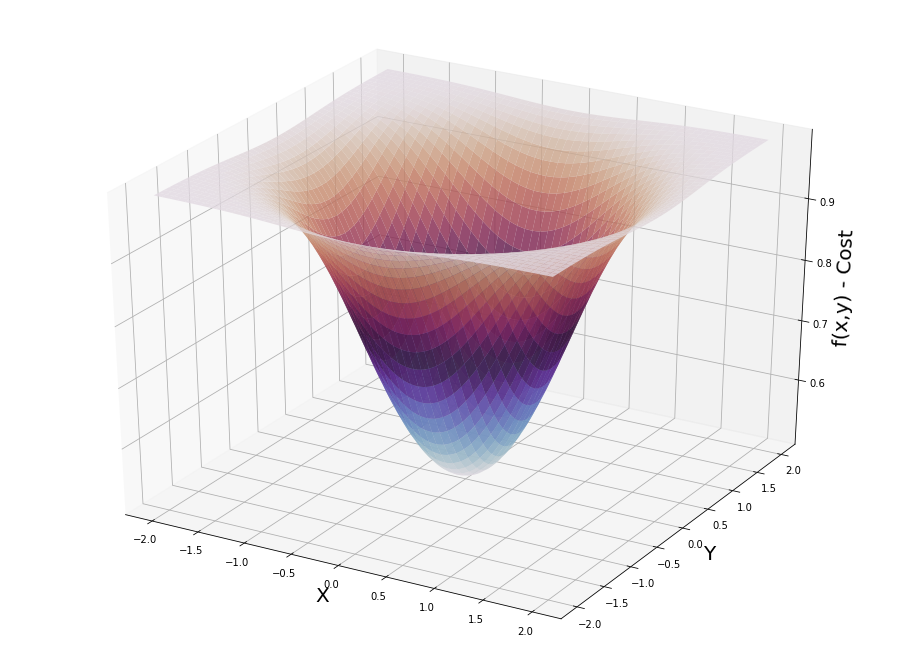

In [17]:
#Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') #gca = get current axis

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x,y) - Cost', fontsize = 20)

ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap = cm.twilight, alpha = 0.8)

plt.show()

## Partial Derivatives and Symbolic Computation
### $$\frac {\partial f}{\partial x} = \frac{2x \ln\left( 3 \right)\cdot3^{-x^2-y^2}}{\left( 3^{-x^2-y^2}+1 \right)^2}$$
### $$\frac {\partial f}{\partial y} = \frac{2y \ln\left( 3 \right)\cdot3^{-x^2-y^2}}{\left( 3^{-x^2-y^2}+1 \right)^2}$$

In [18]:
a, b = symbols("x,y")
print('Our cost function f(x,y) is ')
f(a, b)

Our cost function f(x,y) is 


1/(3**(-x**2 - y**2) + 1)

In [19]:
print('Partial derivative with respect to x is ')
diff(f(a,b),a)

Partial derivative with respect to x is 


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [20]:
print('Cost of f(x,y) at x = 1.8 and y = 1.0 is ')
f(a, b).evalf(subs={a:1.8,b:1.0})

Cost of f(x,y) at x = 1.8 and y = 1.0 is 


0.990604794032582

In [21]:
print('Slope of f(x, y) at x = 1.8 and y = 1.0 along the x axis is ')
diff(f(a,b),a).evalf(subs={a:1.8,b:1.0})

Slope of f(x, y) at x = 1.8 and y = 1.0 along the x axis is 


0.0368089716197505

## Batch Gradient Descent with Sympy

In [22]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

fpxf = diff(f(a, b), a)
fpyf = diff(f(a, b), b)

for n in range(max_iter):
    gradient_x = fpxf.evalf(subs={a:params[0], b:params[1]})
    gradient_y = fpyf.evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print("values in gradient array ", gradients)
print('Minimum occurs at X value of: ', params[0])
print('Minimum occurs at Y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


values in gradient array  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at X value of:  3.45838599885832e-11
Minimum occurs at Y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [23]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [24]:
#Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print("values in gradient array ", gradients)
print('Minimum occurs at X value of: ', params[0])
print('Minimum occurs at Y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


values in gradient array  [2.01013038e-11 1.11673910e-11]
Minimum occurs at X value of:  3.458385998858304e-11
Minimum occurs at Y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [25]:
#Setup
multiplier = .1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1,2)
print(values_array)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
#     values_array = np.append(values_array, params.reshape(1,2), axis = 0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis = 0)

print("values in gradient array ", gradients)
print('Minimum occurs at X value of: ', params[0])
print('Minimum occurs at Y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))


[[1.8 1. ]]
values in gradient array  [2.01013038e-11 1.11673910e-11]
Minimum occurs at X value of:  3.458385998858304e-11
Minimum occurs at Y value of:  1.9213255549212797e-11
The cost is:  0.5


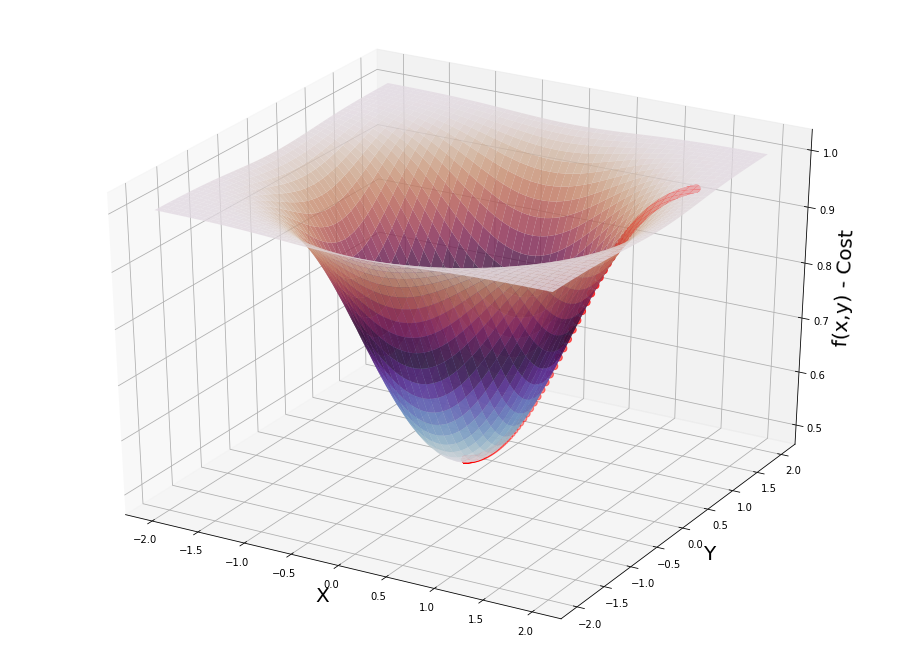

In [26]:
#Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') #gca = get current axis

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x,y) - Cost', fontsize = 20)

ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap = cm.twilight, alpha = 0.8)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]),s=50, color='red')

plt.show()

In [27]:
#Advanced Numpy Array Practice
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'],['Questlove', 'Drums']])
print(hs_band.shape)
print(hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames: ', the_roots[:,0])

the_roots = np.append(the_roots, values=[['Malik B', 'MC']], axis = 0)

print('Printing band roles: ', the_roots[:,1])

(1, 2)
(2, 2)
Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames:  ['Black Thought' 'Questlove' 'Captain']
Printing band roles:  ['MC' 'Drums' 'Guitar' 'MC']


## Example 5 - Working with data and a real cost function
### Mean squared error: a cost function for regression problems 
#### $$RSS = \sum_{i=1}^{n}\big(y^{(i)} - h_\theta x^{(i)} \big)^2$$

#### $$MSE = \frac{1}{n}\sum_{i=1}^{n}\big(y^{(i)} - h_\theta x^{(i)} \big)^2$$

#### $$MSE = \frac{1}{n}\sum_{i=1}^{n}\big( y - \hat{y} \big)^2$$

The reason we divide the mean squared error by n and use that as the cost function is because we need to average of the errors. That is what we want to minimize. If we tried to minimize the residual sum of squares then more data would affect that. Summing all of those up will just get huge. So we average it out over the number of data points to keep it small.

In [28]:
x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)
#both methods do the same thing. They get our array into the right shape for the Linear Regression method

print('shape of x_5: ',x_5.shape)
print('shape of y_5: ',y_5.shape)

shape of x_5:  (7, 1)
shape of y_5:  (7, 1)


In [33]:
#Quick Linear Regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])

Theta 0:  0.8475351486029545
Theta 1:  1.2227264637835913


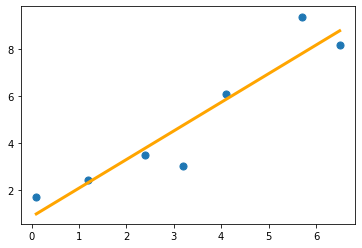

In [34]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),color='orange',linewidth=3)
plt.xlabel='x values'
plt.ylabel='y values'
plt.show()

In [37]:
#y_hat = theta0 +theta1*x 
#y_hat is the calculated y value using the fitted function
y_hat = 0.8475351486029545 + 1.2227264637835913*x_5
print("estimated values y_hat:\n",y_hat)
print("in comparison, the actual y values are:\n",y_5)

estimated values y_hat:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
in comparison, the actual y values are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [45]:
def mse (y, y_hat):
#     sum_of_squared_errors = sum((y-y_hat)**2)
#     mse_val = sum_of_squared_errors/len(y)
    mse_val = np.average((y - y_hat)**2, axis=0)
    return mse_val

In [46]:
print('Manually calculated MSE: ',mse(y_5,y_hat))
print('Sklearn MSE with manual calc: ',mean_squared_error(y_5,y_hat))
print('Sklearn MSE: ',mean_squared_error(y_5,y_hat))

[0.94796558]
